In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("datasets/students-performance.csv")

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Data discovery

In [3]:
# check for data type and null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# another way to check for null values

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# check for dumplicated rows

data.duplicated().sum()

0

In [6]:
# check for distinct values (focus on categorical columns)

data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
data["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

#### Rename Columns

In [8]:
data.rename(columns = {
  "race/ethnicity": "race",
  "parental level of education": "parental_education",
  "test preparation course": "preparation_course",
}, inplace=True)

data.columns = [column.replace(" ", "_") for column in data]

data.head()

,gender,race,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Date Analyze

In [9]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
math_full_score = data[data["math_score"] == 100]["math_score"].count()
reading_full_score = data[data["reading_score"] == 100]["reading_score"].count()
writing_full_score = data[data["writing_score"] == 100]["writing_score"].count()

print(f"math full score: {math_full_score}")
print(f"reading full score: {reading_full_score}")
print(f"writing full score: {writing_full_score}")

math full score: 7
reading full score: 17
writing full score: 14


In [27]:
pass_grade = 50

data["pass_math"] = ["yes" if i >= pass_grade else "no" for i in data["math_score"]]
data["pass_reading"] =["yes" if i >= pass_grade else "no" for i in data["reading_score"]]
data["pass_writing"] = ["yes" if i >= pass_grade else "no" for i in data["writing_score"]]

data[["math_score", "pass_math", "reading_score", "pass_reading", "writing_score", "pass_writing"]].sample(5)

,math_score,pass_math,reading_score,pass_reading,writing_score,pass_writing
961,48,no,54,yes,53,yes
311,66,yes,60,yes,57,yes
489,79,yes,82,yes,82,yes
424,41,no,39,no,34,no
865,82,yes,82,yes,88,yes


In [12]:
pass_math = data.groupby("pass_math")["pass_math"].count()
pass_reading = data.groupby("pass_reading")["pass_reading"].count()
pass_writing = data.groupby("pass_writing")["pass_writing"].count()

print(pass_math, pass_reading, pass_writing)

pass_math
no     135
yes    865
Name: pass_math, dtype: int64 pass_reading
no      90
yes    910
Name: pass_reading, dtype: int64 pass_writing
no     114
yes    886
Name: pass_writing, dtype: int64


<Axes: xlabel='writing_score', ylabel='Count'>

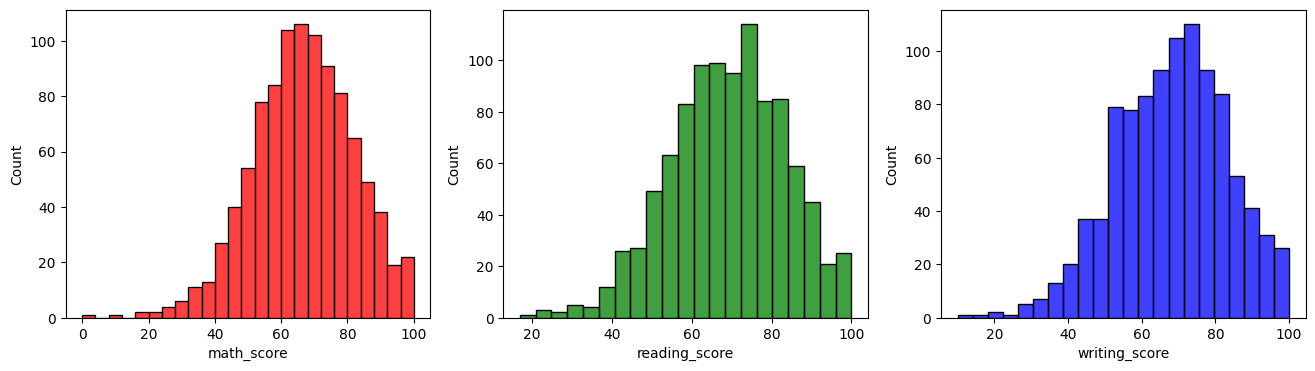

In [13]:
figure, axes = plt.subplots(1, 3, figsize = (16, 4))

sns.histplot(x = "math_score", data = data, color = "red", ax = axes[0])
sns.histplot(x = "reading_score", data = data, color = "green", ax = axes[1])
sns.histplot(x = "writing_score", data = data, color = "blue", ax = axes[2])

<Axes: xlabel='passed', ylabel='count'>

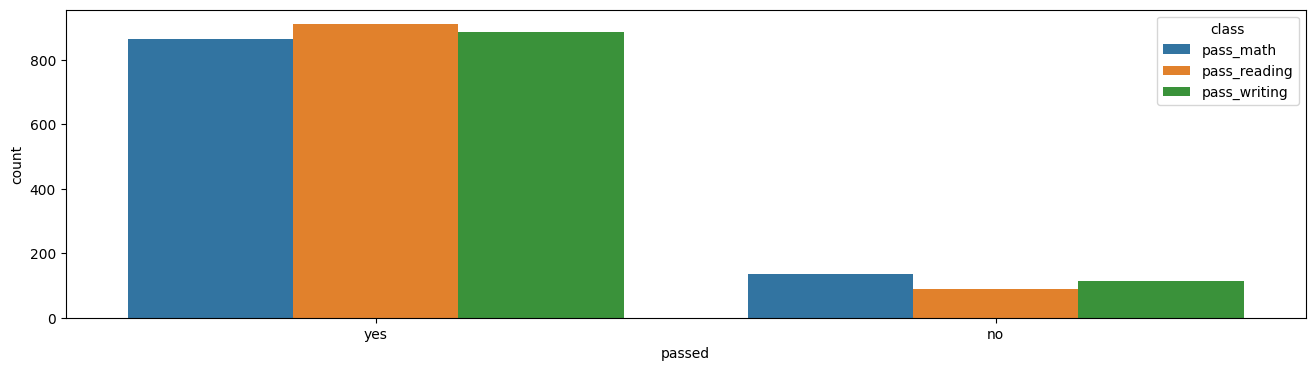

In [14]:
pass_data = pd.melt(data,
        id_vars = ["math_score", "reading_score", "writing_score"],
        value_vars = ["pass_math", "pass_reading", "pass_writing"],
        var_name="class", value_name="passed")

figure = plt.figure(figsize = (16, 4))

sns.countplot(data = pass_data, x = "passed", hue = "class")

Text(0.5, 1.0, 'Preparation Course')

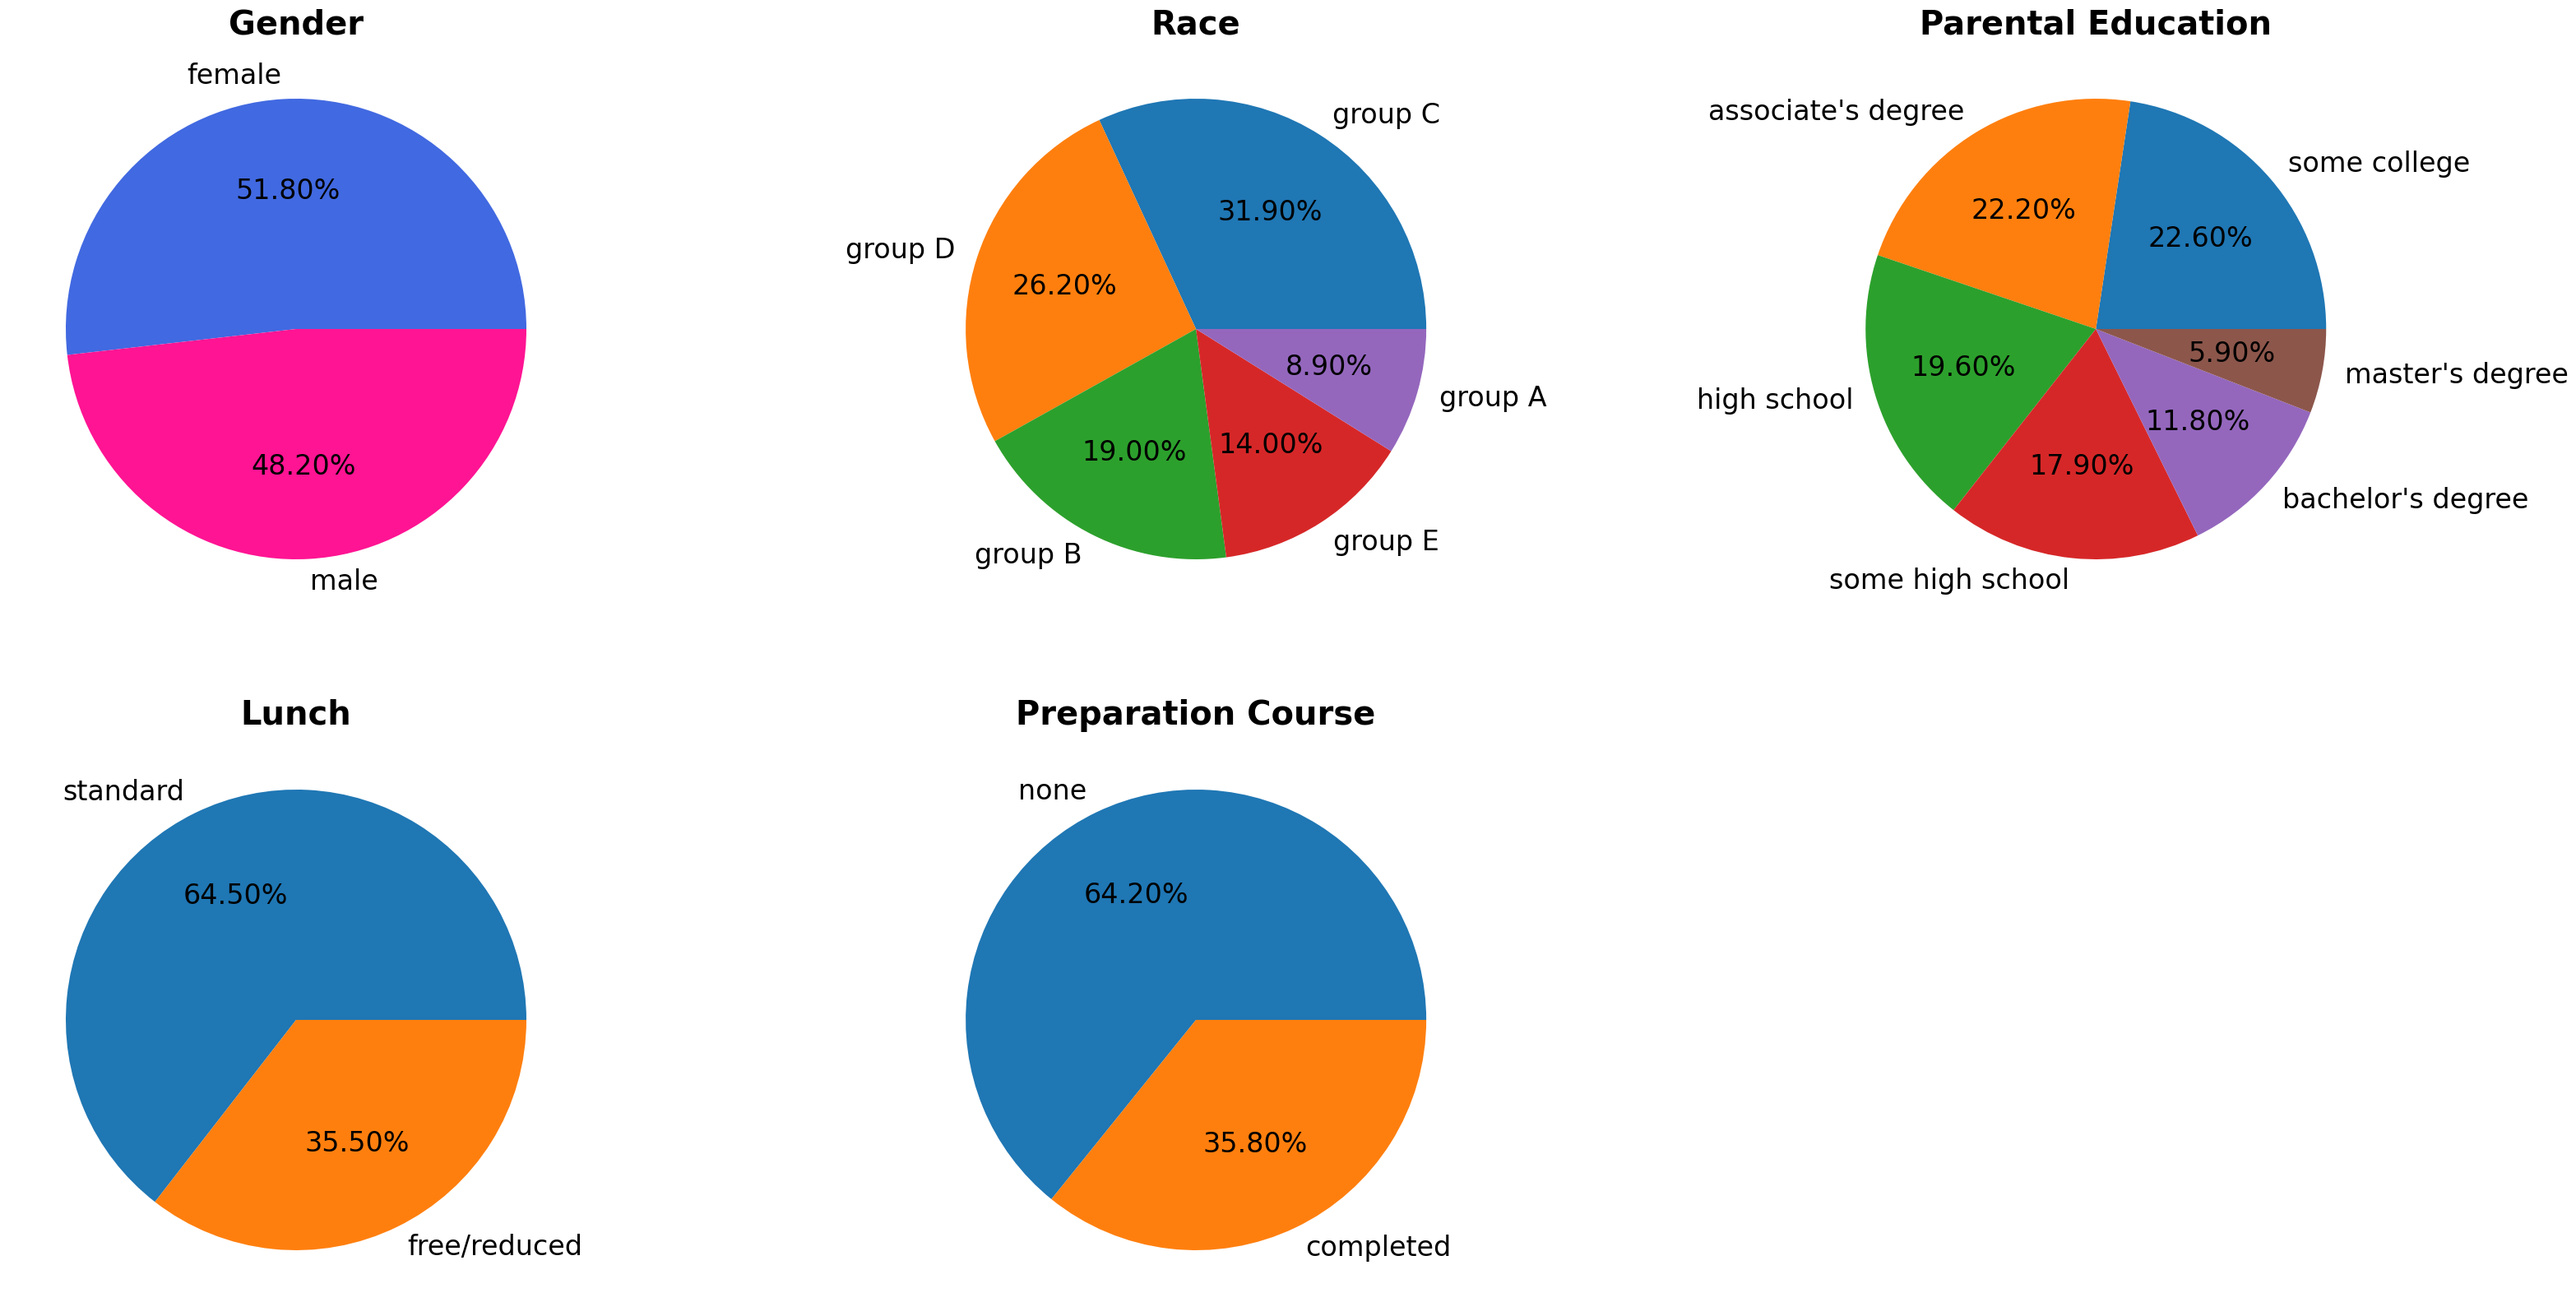

In [15]:
plt.rcParams["figure.figsize"] = (40, 20)
plt.rcParams["font.size"] = 24

plt.subplot(2, 3, 1)

pie_data = data["gender"].value_counts()
labels = pie_data.index.tolist()
colors = ["royalblue", "deeppink"]

plt.pie(pie_data, colors = colors, labels = labels, autopct = "%.2f%%")
plt.title("Gender", fontweight = "bold")

########

plt.subplot(2, 3, 2)

pie_data = data["race"].value_counts()
labels = pie_data.index.tolist()

plt.pie(pie_data, labels = labels, autopct = "%.2f%%")
plt.title("Race", fontweight = "bold")

########

plt.subplot(2, 3, 3)

pie_data = data["parental_education"].value_counts()
labels = pie_data.index.tolist()

plt.pie(pie_data, labels = labels, autopct = "%.2f%%")
plt.title("Parental Education", fontweight = "bold")

########

plt.subplot(2, 3, 4)

pie_data = data["lunch"].value_counts()
labels = pie_data.index.tolist()

plt.pie(pie_data, labels = labels, autopct = "%.2f%%")
plt.title("Lunch", fontweight = "bold")

########

plt.subplot(2, 3, 5)

pie_data = data["preparation_course"].value_counts()
labels = pie_data.index.tolist()

plt.pie(pie_data, labels = labels, autopct = "%.2f%%")
plt.title("Preparation Course", fontweight = "bold")

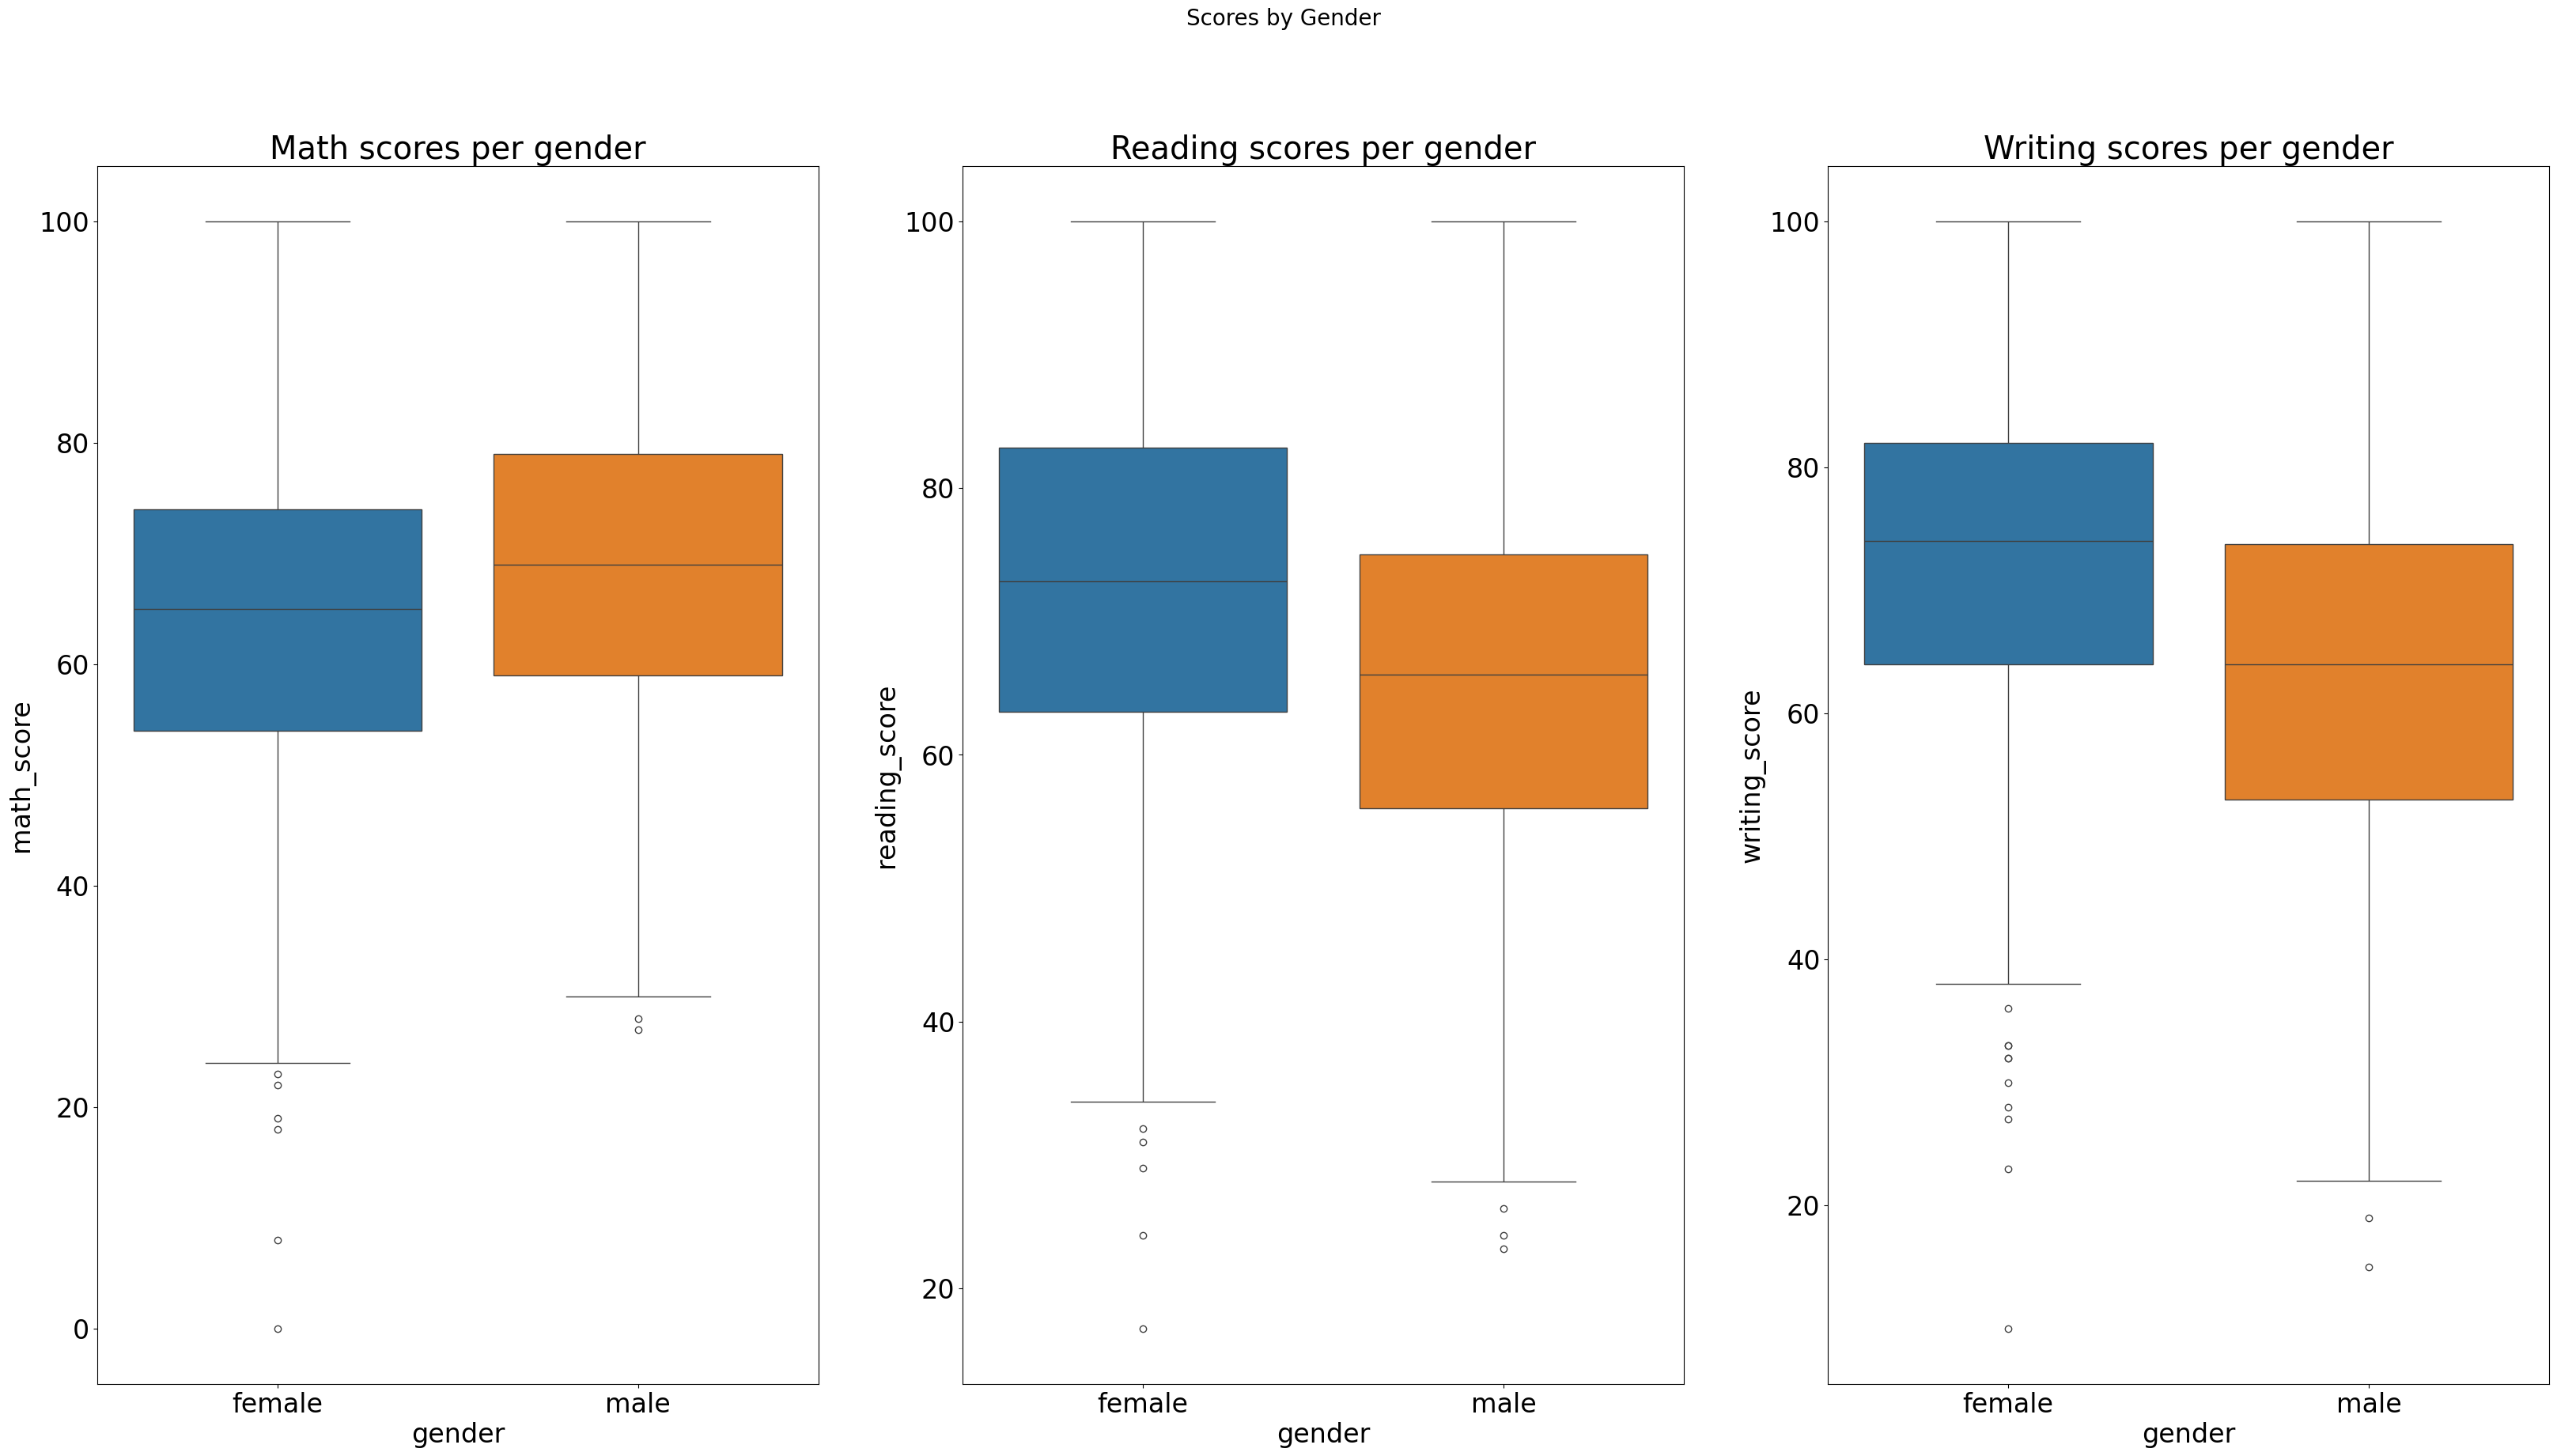

In [16]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3)

figure.suptitle("Scores by Gender", fontsize = 20)

sns.boxplot(data = data, x = "gender", y = "math_score", hue = "gender", ax = ax1)
ax1.title.set_text("Math scores per gender")

sns.boxplot(data = data, x = "gender", y = "reading_score", hue = "gender", ax = ax2)
ax2.title.set_text("Reading scores per gender")

sns.boxplot(data = data, x = "gender", y = "writing_score", hue = "gender", ax = ax3)
ax3.title.set_text("Writing scores per gender")


[Text(0, 0, "bachelor's degree"),
 Text(1, 0, 'some college'),
 Text(2, 0, "master's degree"),
 Text(3, 0, "associate's degree"),
 Text(4, 0, 'high school'),
 Text(5, 0, 'some high school')]

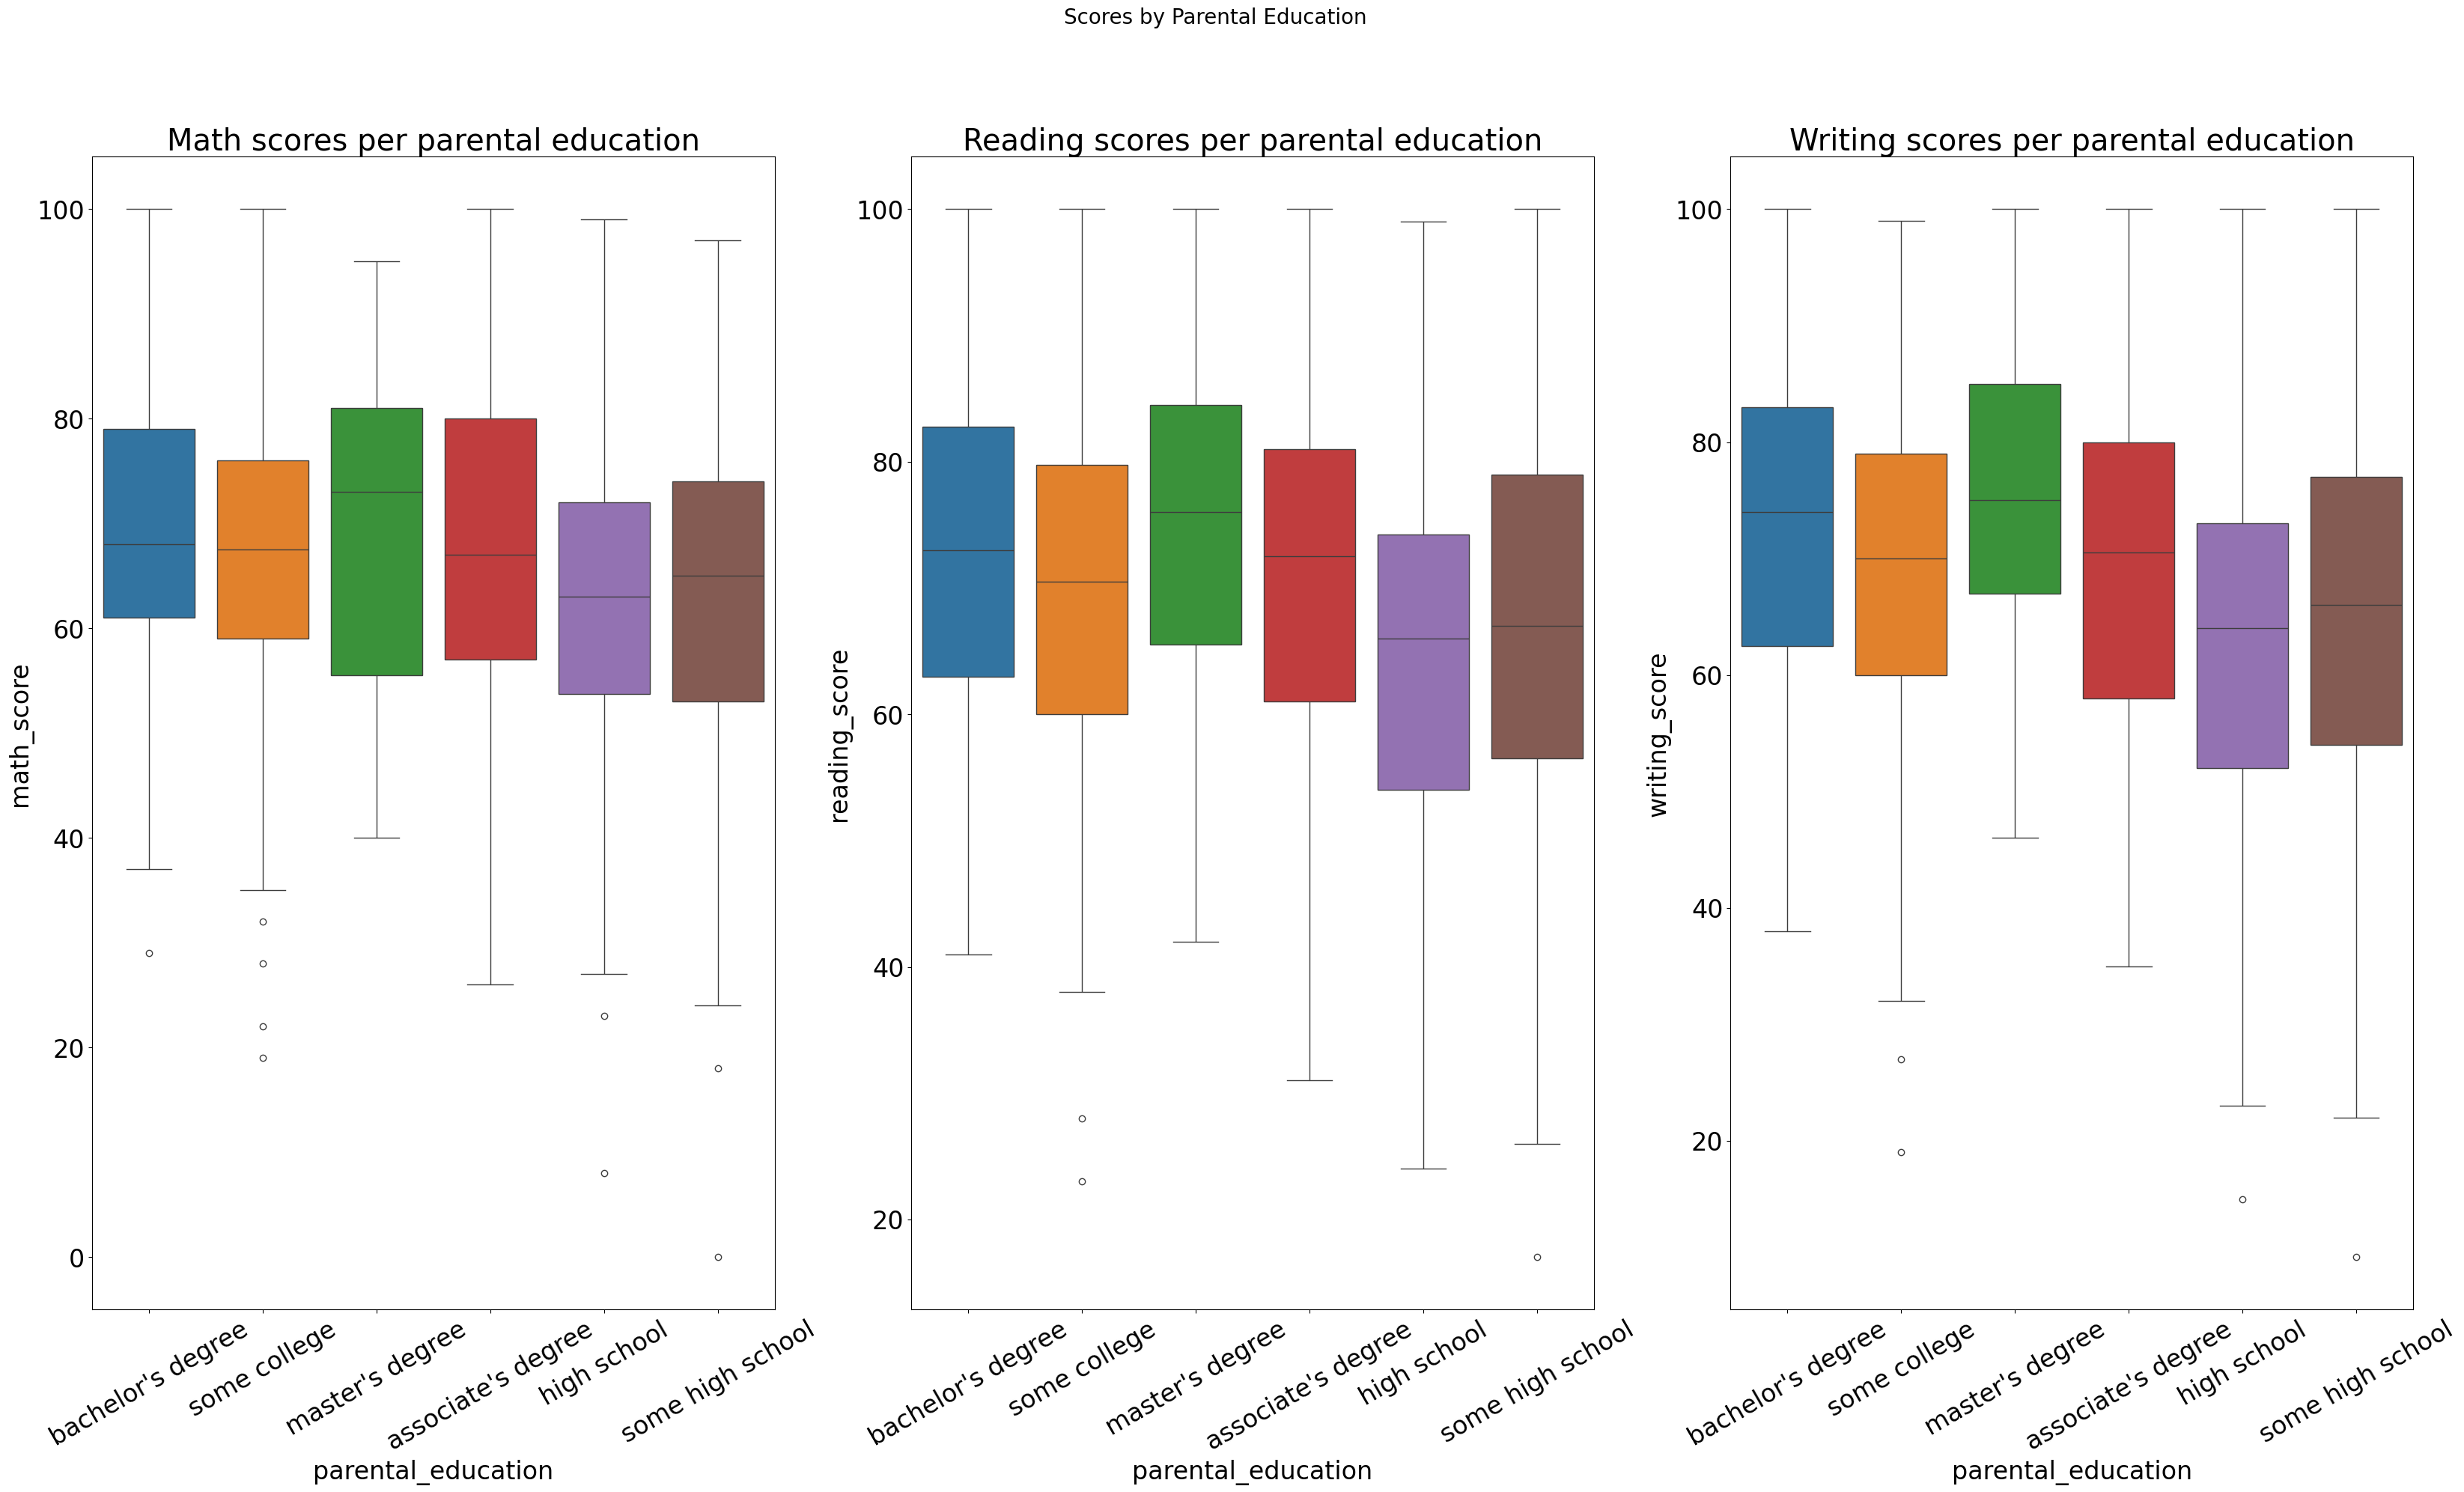

In [17]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3)

figure.suptitle("Scores by Parental Education", fontsize = 20)

sns.boxplot(data = data, x = "parental_education", y = "math_score", hue = "parental_education", ax = ax1)
ax1.title.set_text("Math scores per parental education")
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation  = 30)

sns.boxplot(data = data, x = "parental_education", y = "reading_score", hue = "parental_education", ax = ax2)
ax2.title.set_text("Reading scores per parental education")
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(), rotation  = 30)

sns.boxplot(data = data, x = "parental_education", y = "writing_score", hue = "parental_education", ax = ax3)
ax3.title.set_text("Writing scores per parental education")
ax3.set_xticks(ax3.get_xticks())
ax3.set_xticklabels(ax3.get_xticklabels(), rotation  = 30)